# Applying the gluing method to R(K4,K6-e)

## First, methods for enumerating (r, s, t)-cliques and (r, s, t)-independent sets. 

Recall for (r, s, t)-cliques, (r, s, t) can be (0, 2, 2). Note we don't have to change anything here.

In [65]:
import itertools
# Description: Defintion on page 6
# Input: G, a (first pointed graph we are gluing) and H, b (second pointed graph we are glueing)
# K is the shared neighborhood of a and b in both graphs (K is in R(3,5,d)). Note that for this method, we assume
# K's vertices when found in G and H will have the same labels in all 3 graphs.
# Output: A list of all the (r, s, t) cliques. 


def get_rst_cliques(G, a, H, b, K):
    #Contains 3-tuples of the form (w_tuple, x_tuple, y_tuple)
    rst_cliques = []
    VK = K.vertices()
    xs = (set(G.vertices()) - set(VK))
    xs.remove(a)
    ys = (set(H.vertices()) - set(VK))
    ys.remove(b)

    def clique_helper(r, s, t, VK_, xs_, ys_):
        output = []
        if r > 0:
            for w_comb in itertools.combinations(VK_,r):
                #contains s-tuples that form r+s - independent sets with w in G
                x_cliques = []
                #contains t-tuples that form r+t - independent sets with w in H
                y_cliques = []

                for x_comb in itertools.combinations(xs_, s):
                    comb = w_comb + x_comb
                    if G.is_clique(comb):
                        x_cliques.append(x_comb)

                for y_comb in itertools.combinations(ys_, t):
                    comb = w_comb + y_comb
                    if H.is_clique(comb):
                        y_cliques.append(y_comb)

                for x_comb in x_cliques:
                    for y_comb in y_cliques:
                        output.append( ( w_comb, x_comb, y_comb ) )
            return output
        else:
            #contains s-tuples that form s - independent sets in G
            x_cliques = []
            #contains t-tuples that form t - independent sets in H
            y_cliques = []
            for x_comb in itertools.combinations(xs_, s):
                if G.is_clique(x_comb):
                    x_cliques.append(x_comb)

            for y_comb in itertools.combinations(ys_, t):
                if H.is_clique(y_comb):
                    y_cliques.append(y_comb)

            for x_comb in x_cliques:
                for y_comb in y_cliques:
                    output.append( ( (), x_comb, y_comb ) )
            
            return output


    rst_cliques += clique_helper(0,2,2,VK,xs,ys)

    return rst_cliques

Recall for (r, s, t)-independent sets, we have (r, s, t) is either (4, 1, 1), (3, 1, 2), (3, 2, 1), (2, 3, 1), (2, 1, 3), (2, 2, 2), (1, 2, 3), (1, 3, 2), (1, 4, 1), (1, 1, 4), (0, 3, 3), (0, 2, 4), (0, 4, 2). Note we aren't *really* going to use (r,s,t)-independent sets later but something similar (there needs to be at least 2 edges present between G and H).

In [66]:
# Description: Defintion on page 6
# Input: G, a (first pointed graph we are gluing) and H, b (second pointed graph we are glueing)
# K is the shared neighborhood of a and b in both graphs (K is in R(3,5,d)). Note that for this method, we assume
# K's vertices when found in G and H will have the same labels in all 3 graphs.
# Output: A list of all the (r, s, t) independent sets. 
def get_rst_independent_sets(G, a, H, b, K):
    #Contains 3-tuples of the form (w_tuple, x_tuple, y_tuple)
    rst_IS = []
    VK = K.vertices()
    xs = (set(G.vertices()) - set(VK))
    xs.remove(a)
    ys = (set(H.vertices()) - set(VK))
    ys.remove(b)

    def indepHelper(r,s,t, VK_, xs_, ys_):
        output = []
        if r > 0:
            for w_comb in itertools.combinations(VK_,r):
                #contains s-tuples that form r+s - independent sets with w in G
                x_cliques = []
                #contains t-tuples that form r+t - independent sets with w in H
                y_cliques = []

                for x_comb in itertools.combinations(xs_, s):
                    comb = w_comb + x_comb
                    if G.is_independent_set(comb):
                        x_cliques.append(x_comb)

                for y_comb in itertools.combinations(ys_, t):
                    comb = w_comb + y_comb
                    if H.is_independent_set(comb):
                        y_cliques.append(y_comb)

                for x_comb in x_cliques:
                    for y_comb in y_cliques:
                        output.append( ( w_comb, x_comb, y_comb ) )
            return output
        else:
            #contains s-tuples that form s - independent sets in G
            x_cliques = []
            #contains t-tuples that form t - independent sets in H
            y_cliques = []
            for x_comb in itertools.combinations(xs_, s):
                if G.is_independent_set(x_comb):
                    x_cliques.append(x_comb)

            for y_comb in itertools.combinations(ys_, t):
                if H.is_independent_set(y_comb):
                    y_cliques.append(y_comb)

            for x_comb in x_cliques:
                for y_comb in y_cliques:
                    output.append( ( (), x_comb, y_comb ) )
            
            return output

    rst_IS += indepHelper(4, 1, 1, VK, xs, ys)
    rst_IS += indepHelper(3, 1, 2, VK, xs, ys)
    rst_IS += indepHelper(3, 2, 1, VK, xs, ys)
    rst_IS += indepHelper(2, 3, 1, VK, xs, ys)
    rst_IS += indepHelper(2, 1, 3, VK, xs, ys)
    rst_IS += indepHelper(2, 2, 2, VK, xs, ys)
    rst_IS += indepHelper(1, 2, 3, VK, xs, ys)
    rst_IS += indepHelper(1, 3, 2, VK, xs, ys)
    rst_IS += indepHelper(1, 4, 1, VK, xs, ys)
    rst_IS += indepHelper(1, 1, 4, VK, xs, ys)
    rst_IS += indepHelper(0, 3, 3, VK, xs, ys)
    rst_IS += indepHelper(0, 2, 4, VK, xs, ys)
    rst_IS += indepHelper(0, 4, 2, VK, xs, ys)
    
    return rst_IS

Note we also have a third kind now - if there is an edge between 2 vertices in G/H, technically it can be still used

In [67]:
# Description: Indep-set but now we can have 1 edge between vertices in G/H.
# Input: G, a (first pointed graph we are gluing) and H, b (second pointed graph we are glueing)
# K is the shared neighborhood of a and b in both graphs (K is in R(3,5,d)). Note that for this method, we assume
# K's vertices when found in G and H will have the same labels in all 3 graphs.
# Output: A list of all sort of (r, s, t) independent sets. 
def get_rst_indep_sets_one_edge(G, a, H, b, K):
    #Contains 3-tuples of the form (w_tuple, x_tuple, y_tuple)
    rst_IS = []
    VK = K.vertices()
    xs = (set(G.vertices()) - set(VK))
    xs.remove(a)
    ys = (set(H.vertices()) - set(VK))
    ys.remove(b)

    def indepOneEdgeHelper(r,s,t, VK_, xs_, ys_):
        output = []
        if r > 0:
            for w_comb in itertools.combinations(VK_,r):
                #contains s-tuples that form r+s - independent sets with w in G
                x_edge_set = []
                x_no_edge_set = []
                #contains t-tuples that form r+t - independent sets with w in H
                y_edge_set = []
                y_no_edge_set = []
                if s >= 2:
                    for x_comb in itertools.combinations(xs_, s):
                        comb = w_comb + x_comb
                        num_edges = 0
                        for pairs in itertools.combinations(comb, 2):
                            if G.has_edge(pairs[0], pairs[1]):
                                num_edges += 1
                        if num_edges == 1:
                            x_edge_set.append(x_comb)

                    for y_comb in itertools.combinations(ys_, t):
                        comb = w_comb + y_comb
                        if H.is_independent_set(comb):
                            y_no_edge_set.append(y_comb)
                if t >= 2:
                    for x_comb in itertools.combinations(xs_, s):
                        comb = w_comb + x_comb
                        if G.is_independent_set(comb):
                            x_no_edge_set.append(comb)

                    for y_comb in itertools.combinations(ys_, t):
                        comb = w_comb + y_comb
                        num_edges = 0
                        for pairs in itertools.combinations(comb, 2):
                            if H.has_edge(pairs[0], pairs[1]):
                                num_edges += 1
                        if num_edges == 1:
                            y_edge_set.append(y_comb)

                for x_comb in x_edge_set:
                    for y_comb in y_no_edge_set:
                        output.append( ( w_comb, x_comb, y_comb ) )
                for x_comb in x_no_edge_set:
                    for y_comb in y_edge_set:
                        output.append( ( w_comb, x_comb, y_comb ) )
            return output
        else:
            #contains s-tuples that form r+s - independent sets with w in G
            x_edge_set = []
            x_no_edge_set = []
            #contains t-tuples that form r+t - independent sets with w in H
            y_edge_set = []
            y_no_edge_set = []
            if s >= 2:
                for x_comb in itertools.combinations(xs_, s):
                    num_edges = 0
                    for pairs in itertools.combinations(x_comb, 2):
                        if G.has_edge(pairs[0], pairs[1]):
                            num_edges += 1
                    if num_edges == 1:
                        x_edge_set.append(x_comb)

                for y_comb in itertools.combinations(ys_, t):
                    if H.is_independent_set(y_comb):
                        y_no_edge_set.append(y_comb)
            if t >= 2:
                for x_comb in itertools.combinations(xs_, s):
                    if G.is_independent_set(x_comb):
                        x_no_edge_set.append(x_comb)

                for y_comb in itertools.combinations(ys_, t):
                    num_edges = 0
                    for pairs in itertools.combinations(y_comb, 2):
                        if H.has_edge(pairs[0], pairs[1]):
                            num_edges += 1
                    if num_edges == 1:
                        y_edge_set.append(y_comb)

            for x_comb in x_edge_set:
                for y_comb in y_no_edge_set:
                    output.append( ( (), x_comb, y_comb ) )
            for x_comb in x_no_edge_set:
                for y_comb in y_edge_set:
                    output.append( ( (), x_comb, y_comb ) )
            
            return output

    #rst_IS += indepHelper(4, 1, 1, VK, xs, ys)
    rst_IS += indepOneEdgeHelper(3, 1, 2, VK, xs, ys)
    rst_IS += indepOneEdgeHelper(3, 2, 1, VK, xs, ys)
    rst_IS += indepOneEdgeHelper(2, 3, 1, VK, xs, ys)
    rst_IS += indepOneEdgeHelper(2, 1, 3, VK, xs, ys)
    rst_IS += indepOneEdgeHelper(2, 2, 2, VK, xs, ys)
    rst_IS += indepOneEdgeHelper(1, 2, 3, VK, xs, ys)
    rst_IS += indepOneEdgeHelper(1, 3, 2, VK, xs, ys)
    rst_IS += indepOneEdgeHelper(1, 4, 1, VK, xs, ys)
    rst_IS += indepOneEdgeHelper(1, 1, 4, VK, xs, ys)
    rst_IS += indepOneEdgeHelper(0, 3, 3, VK, xs, ys)
    rst_IS += indepOneEdgeHelper(0, 2, 4, VK, xs, ys)
    rst_IS += indepOneEdgeHelper(0, 4, 2, VK, xs, ys)
    
    return rst_IS

# Second, a method that turns constraints on M into a SAT instance.  

A very popular question in computer science is the *SATisfiability problem* which asks: how do you determine if a boolean formula (on n boolean variables) has an assignment of the variables that makes the formula true. Our formulas tend to be of the following form 

(x_1 OR x_2 OR ... x_k) AND (y_1 OR y_2 OR ... y_k) AND ... AND (z_1 OR z_2 OR ... OR z_k)

It turns out SAT is an NP hard problem! But SAT solving is such a common instance in computer science, there's a whole host of results and algorithms on it. 

We have a bunch of 0, 1 variables in a matrix M which needs to satisfy certain constraints (dictated by the rst cliques and indpendent sets). This is an excerpt from the paper: 

` Each entry m_ij of M is a variable, with value FALSE, TRUE or UNKNOWN, while each set {x1, . . . , xs} × {y1, . . . , yt} is a clause. Clauses from potential (r, s, t)-cliques can’t have all their variables TRUE, while clauses from potential independent (r, s, t)-sets can’t have all their variables FALSE.`
 
In other words, each rst clique / independent set exactly corresponds to a clause in our SAT formula! So, finding all the possible matrices M amounts to finding all the satisfying assignments of a certain formula. 

In [68]:
# Description: Takes two pointed graphs and creates a SAT formula encoding the constraints a glueing defined by M must satisfy. 
# Input: Two pointed graphs (variables names according to notation in paper)
# Output: A list of clauses, along with maps from vertices of G and H to indices for the matrix M
import GluingClassesJ as gcj

def create_SAT_formula(G, a, H, b, K):
    
    # Find the rst-cliques and independent graphs
    rst_cliques = get_rst_cliques(G, a, H, b, K)
    rst_IS = get_rst_independent_sets(G, a, H, b, K)
    rst_ISOE =  get_rst_indep_sets_one_edge(G, a, H, b, K)
    
    VK = K.vertices()
    xs = (set(G.vertices()) - set(VK))
    xs.remove(a)
    g_map = {}
    i = 0
    for x in xs:
        g_map[x] = i
        i += 1

    ys = (set(H.vertices()) - set(VK))
    ys.remove(b)
    h_map = {}
    i = 0
    for y in ys:
        h_map[y] = i
        i += 1

    d_prime = len(xs) #i think this should be correct
    M = gcj.PotentialEdgeMatrix(d_prime, d_prime)
    clauses = []


    # For each (rst)-clique and independent set create a new Clause to represent it
    for clique in rst_cliques:
        g_vertices = clique[1]
        h_vertices = clique[2]
        variables = []
        for g_vertex in g_vertices:
            for h_vertex in h_vertices:
                variables.append(M.matrix[g_map[g_vertex]][h_map[h_vertex]])
        new_clause = gcj.Clause(variables, gcj.ClauseType.CLIQUE)
        clauses.append(new_clause)

    for indep_set in rst_IS:
        g_vertices = indep_set[1]
        h_vertices = indep_set[2]
        variables = []
        for g_vertex in g_vertices:
            for h_vertex in h_vertices:
                variables.append(M.matrix[g_map[g_vertex]][h_map[h_vertex]])
        new_clause = gcj.Clause(variables, gcj.ClauseType.INDEP_NO_EDGES)
        clauses.append(new_clause)

    for indep_set_OE in rst_ISOE:
        g_vertices = indep_set[1]
        h_vertices = indep_set[2]
        variables = []
        for g_vertex in g_vertices:
            for h_vertex in h_vertices:
                variables.append(M.matrix[g_map[g_vertex]][h_map[h_vertex]])
        new_clause = gcj.Clause(variables, gcj.ClauseType.INDEP_SAME_SET_EDGE)
        clauses.append(new_clause)
    
    return clauses, M, g_map, h_map

Once we have the SAT formula, we have to find all the satisfying assignments! Is there a Sage method which will just do this for us? Most likely (there are many SAT solvers out there). We implement the paper's stack based recursive solution. Here is the non-recursive part first

In [69]:
#Description: Takes a pre-setup stack and computes as much assignment as possible
#Input: stack is just a list used as a stack of variables. Note that because of how references work in python - modifying parts of stack
#effects the matrix and clauses outside of this function. 
#This probably means we need to make a copy of M/clauses/a new stack for each execution in case of failure.
#Output: Returns true/false if it works
def stack_algo(stack):
    assignments = []
    while len(stack) > 0:
        alpha = stack.pop()
        if alpha.exists == gcj.EdgeExists.FALSE:
            for i_clause in alpha.ind_set_clauses:
                num_variables = len(i_clause.potential_edges)
                #This means all are FALSE
                if i_clause.in_fail_state():
                    print(str(i_clause) + " isn't satisfiable")
                    return False
                #this means all are FALSE except two variable
                elif i_clause.num_undesired == num_variables - 2 and i_clause.num_unknown == 2:
                    for beta in i_clause.potential_edges:
                        if beta.exists == gcj.EdgeExists.UNKNOWN:
                            beta.set_exists(gcj.EdgeExists.TRUE)
                            #print(str(beta) + " is now true")
                            stack.append(beta)
            for i_clause in alpha.ind_same_set_clauses:
                num_variables = len(i_clause.potential_edges)
                #This means all are FALSE
                if i_clause.in_fail_state():
                    print(str(i_clause) + " isn't satisfiable")
                    return False
                #this means all are FALSE except one variable
                elif i_clause.num_undesired == num_variables - 1 and i_clause.num_unknown == 1:
                    for beta in i_clause.potential_edges:
                        if beta.exists == gcj.EdgeExists.UNKNOWN:
                            beta.set_exists(gcj.EdgeExists.TRUE)
                            #print(str(beta) + " is now true")
                            stack.append(beta)
        else:
            for c_clause in alpha.clique_clauses:
                num_variables = len(c_clause.potential_edges)
                #this means all are TRUE
                if c_clause.in_fail_state():
                    print(str(c_clause) + " isn't satisfiable")
                    return False
                #this means all are TRUE except one variable
                elif c_clause.num_undesired == num_variables - 1 and c_clause.num_unknown == 1:
                    for beta in c_clause.potential_edges:
                        if beta.exists == gcj.EdgeExists.UNKNOWN:
                            beta.set_exists(gcj.EdgeExists.FALSE)
                            #print(str(beta) + " is now false")
                            stack.append(beta)
    return True

In [70]:
# Sets up a stack to be used in the first call to stack_algo()
# INPUT: The set of clauses
# OUTPUT: A stack set up to be used in a first call to stack_algo()
def setup_stack(clauses):
    stack = []
    
    for clause in clauses:
        if len(clause.potential_edges) == 1:
            if clause.clause_type == gcj.ClauseType.CLIQUE:
                clause.potential_edges[0].set_exists(gcj.EdgeExists.FALSE)
                stack.append(clause.potential_edges[0])
            elif clause.clause_type == gcj.ClauseType.INDEP_SAME_SET_EDGE:
                clause.potential_edges[0].set_exists(gc.EdgeExists.TRUE)
                stack.append(clause.potential_edges[0])
        elif len(clause.potential_edges) == 2:
            if clause.clause_type == gcj.ClauseType.INDEP_NO_EDGES:
                clause.potential_edges[0].set_exists(gc.EdgeExists.TRUE)
                stack.append(clause.potential_edges[0])
                clause.potential_edges[1].set_exists(gc.EdgeExists.TRUE)
                stack.append(clause.potential_edges[1])
                
    return stack

In [71]:
#Description: Takes the variables and clauses and recursively calls the stack algo to find all gluings
#Input: M, and clauses are the initial variables and clauses. 
#This probably means we need to make a copy of M/clauses/a new stack for each execution in case of failure.
#Output: list of possible gluings

def recursive_solving(M, clauses, stack):
    if stack_algo(stack) == False:
        #return 0
        return []
    else:
        unknown_list = []
        for list in M.matrix:
            for elem in list:
                if elem.exists == gc.EdgeExists.UNKNOWN:
                    unknown_list.append(elem)
        if len(unknown_list) == 0:
            #return 1
            return [M]
        else:
            #this part of the code creates a copy of M and clauses
            #we use the original M and clauses for the first recursion, and the copy for a second
            #this copying is done to prevent changes in one recursion from affecting the second
            num_rows = len(M.matrix)
            num_cols = len(M.matrix[0])
            M_copy = gc.PotentialEdgeMatrix(num_rows, num_cols)
            clauses_copy = []
            for clause in clauses:
                old_vars = clause.potential_edges
                new_vars = []
                for var in old_vars:
                    new_vars.append(M_copy.matrix[var.G_vertex][var.H_vertex])
                new_clause = gc.Clause(new_vars, clause.clause_type)
                clauses_copy.append(new_clause)
            for i in range(num_rows):
                for j in range(num_cols):
                    if M.matrix[i][j].exists == gc.EdgeExists.TRUE:
                        M_copy.matrix[i][j].set_exists(gc.EdgeExists.TRUE)
                    elif M.matrix[i][j].exists == gc.EdgeExists.FALSE:
                        M_copy.matrix[i][j].set_exists(gc.EdgeExists.FALSE)
            
            #Using the paper's heuristic to decide what variable to add to the stack
            next_vertex = unknown_list[0]
            best_forcing = 0
            for unknown_candidate in unknown_list:
                num_forcing = 0
                for c_clause in unknown_candidate.clique_clauses:
                    num_variables = len(c_clause.potential_edges)
                    if c_clause.num_unknown == 2 and c_clause.num_undesired == num_variables - 2:
                        num_forcing += 1 
                for i_clause in unknown_candidate.ind_same_set_clauses:
                    num_variables = len(i_clause.potential_edges)
                    if i_clause.num_unknown == 2 and i_clause.num_undesired == num_variables - 2:
                        num_forcing += 1 
                for i_clause in unknown_candidate.ind_set_clauses:
                    num_variables = len(i_clause.potential_edges)
                    if i_clause.num_unknown == 3 and i_clause.num_undesired == num_variables - 3:
                        num_forcing += 1 
                if num_forcing > best_forcing:
                    next_vertex = unknown_candidate
                    best_forcing = num_forcing
            
            stack = [next_vertex]
            stack_copy = [M_copy.matrix[next_vertex.G_vertex][next_vertex.H_vertex]]
            
            M.matrix[next_vertex.G_vertex][next_vertex.H_vertex].set_exists(gc.EdgeExists.TRUE)
            M_copy.matrix[next_vertex.G_vertex][next_vertex.H_vertex].set_exists(gc.EdgeExists.FALSE)
            
            list1 = recursive_solving(M, clauses, stack)            
            list2 = recursive_solving(M_copy, clauses_copy, stack_copy)

            return list1 + list2

General procedure: Pick some K shared neighborhood. In our case, this just involves choosing a value for d. Then, iterate through all graphs in R(K3,K6-e,16). For each graph, iterate through each vertex and check if a pointed graph can be constructed. Do this again to pick 2 pointed graphs. At this point, attempt to glue the graphs. From the paper: 
> Note that this consisted of one gluing problem for each
automorphism of K.

In our case, this means considering all d! ways to map an instance of K in the first pointed graph to an instance of K in the second graph.
Repeat for 15, 14, 13, and 12 vertex graphs in R(K3, K6-e). 

Note that for 16 vertices, d >= 5. For 15, d >=4, etc.

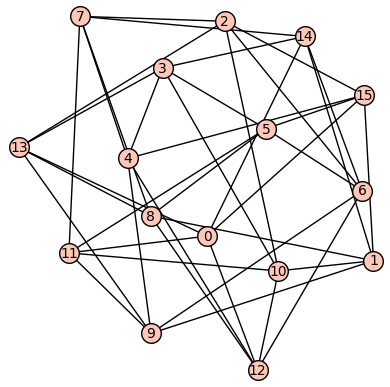

0 0 [11, 12, 13, 14, 15]
0 1 [8, 9, 10, 14, 15]
0 2 [6, 7, 10, 13, 15]
0 3 [4, 5, 10, 13, 14]
0 4 [3, 7, 9, 12, 15]
0 5 [3, 6, 8, 11, 15]
0 6 [2, 5, 9, 12, 14]
0 7 [2, 4, 8, 11, 14]
0 8 [1, 5, 7, 12, 13]
0 9 [1, 4, 6, 11, 13]
0 10 [1, 2, 3, 11, 12]
0 11 [0, 5, 7, 9, 10]
0 12 [0, 4, 6, 8, 10]
0 13 [0, 2, 3, 8, 9]
0 14 [0, 1, 3, 6, 7]
0 15 [0, 1, 2, 4, 5]


In [72]:
from sage.graphs.graph_input import from_graph6
with open('dataset_k3kme/k3k6e_16.g6', 'r') as file: # Opens the file, and closes it once we exit this block. 
    graphs = file.readlines() 
    for i in range(len(graphs)):
        G = Graph() # Create an empty graph
        from_graph6(G, graphs[i])
        G = G.complement()
        G.show()
        for vertex in G.vertices():
            possible_K = G.neighbors(vertex)
            if len(possible_K) == 5 and G.is_independent_set(possible_K):
                print(i,vertex, possible_K)

There are 16 pointed graphs here. We try gluing the first graph to itself with the identity mapping for K

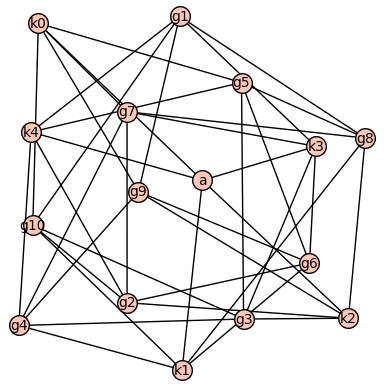

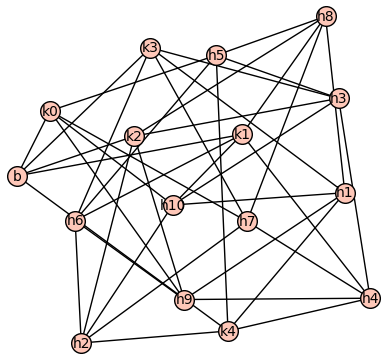

In [74]:
G = Graph()
from_graph6(G, graphs[0])
G = G.complement()
map1 = {0:"a", 11:"k0", 12:"k1", 13:"k2", 14:"k3", 15:"k4"}
for i in range(16):
    if i not in map1:
        map1[i] = "g"+str(i)
G.relabel(map1)
G.show()

H = Graph()
from_graph6(H, graphs[0])
H = H.complement()
map2 = {0:"b", 11:"k0", 12:"k1", 13:"k2", 14:"k3", 15:"k4"}
for i in range(16):
    if i not in map2:
        map2[i] = "h"+str(i)
H.relabel(map2)
H.show()

K = Graph()
K.add_vertices(["k0", "k1", "k2", "k3", "k4"])

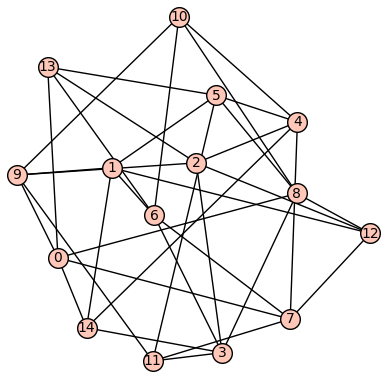

0 0 [7, 8, 9, 13, 14]
0 1 [5, 6, 9, 12, 14]
0 2 [3, 4, 9, 12, 13]
0 3 [2, 6, 8, 11, 14]
0 4 [2, 5, 7, 10, 14]
0 5 [1, 4, 8, 11, 13]
0 6 [1, 3, 7, 10, 13]
0 7 [0, 4, 6, 11, 12]
0 8 [0, 3, 5, 10, 12]
0 9 [0, 1, 2, 10, 11]
0 10 [4, 6, 8, 9]
0 11 [3, 5, 7, 9]
0 12 [1, 2, 7, 8]
0 13 [0, 2, 5, 6]
0 14 [0, 1, 3, 4]


In [61]:
from sage.graphs.graph_input import from_graph6
with open('dataset_k3kme/k3k6e_15.g6', 'r') as file: # Opens the file, and closes it once we exit this block. 
    graphs = file.readlines() 
    for i in range(len(graphs)):
        G = Graph() # Create an empty graph
        from_graph6(G, graphs[i])
        G = G.complement()
        G.show()
        for vertex in G.vertices():
            possible_K = G.neighbors(vertex)
            if len(possible_K) == 4 and G.is_independent_set(possible_K):
                print(i, vertex, possible_K)
            if len(possible_K) == 5 and G.is_independent_set(possible_K):
                print(i, vertex, possible_K)

There are 15 pointed graphs here. Next we find the pointed graphs for 14.

In [62]:
from sage.graphs.graph_input import from_graph6
with open('dataset_k3kme/k3k6e_14.g6', 'r') as file: # Opens the file, and closes it once we exit this block. 
    graphs = file.readlines() 
    for i in range(len(graphs)):
        G = Graph() # Create an empty graph
        from_graph6(G, graphs[i])
        G = G.complement()
        for vertex in G.vertices():
            possible_K = G.neighbors(vertex)
            if len(possible_K) == 3 and G.is_independent_set(possible_K):
                print(i, vertex, possible_K)
            if len(possible_K) == 4 and G.is_independent_set(possible_K):
                print(i, vertex, possible_K)
            if len(possible_K) == 5 and G.is_independent_set(possible_K):
                print(i, vertex, possible_K)

0 0 [3, 7, 9, 10, 11]
0 1 [2, 6, 8, 10, 11]
0 2 [1, 4, 5, 7, 9]
0 3 [0, 4, 5, 6, 8]
0 4 [2, 3, 11, 13]
0 5 [2, 3, 10, 12]
0 6 [1, 3, 9, 12]
0 7 [0, 2, 8, 12]
0 8 [1, 3, 7, 13]
0 9 [0, 2, 6, 13]
0 10 [0, 1, 5, 13]
0 11 [0, 1, 4, 12]
0 12 [5, 6, 7, 11]
0 13 [4, 8, 9, 10]
1 0 [4, 5, 7, 12, 13]
1 1 [2, 3, 6, 12, 13]
1 2 [1, 5, 7, 10, 11]
1 3 [1, 4, 7, 8, 9]
1 4 [0, 3, 6, 10, 11]
1 5 [0, 2, 6, 8, 9]
1 6 [1, 4, 5, 7]
1 7 [0, 2, 3, 6]
1 8 [3, 5, 11, 13]
1 9 [3, 5, 10, 12]
1 10 [2, 4, 9, 13]
1 11 [2, 4, 8, 12]
1 12 [0, 1, 9, 11]
1 13 [0, 1, 8, 10]
2 0 [4, 5, 10, 11, 13]
2 1 [2, 3, 10, 11, 12]
2 2 [1, 5, 8, 9, 13]
2 3 [1, 4, 6, 7, 13]
2 4 [0, 3, 8, 9, 12]
2 5 [0, 2, 6, 7, 12]
2 6 [3, 5, 9, 11]
2 7 [3, 5, 8, 10]
2 8 [2, 4, 7, 11]
2 9 [2, 4, 6, 10]
2 10 [0, 1, 7, 9]
2 11 [0, 1, 6, 8]
2 12 [1, 4, 5]
2 13 [0, 2, 3]
3 0 [5, 10, 11, 12, 13]
3 1 [4, 8, 9, 12, 13]
3 2 [3, 7, 9, 11, 13]
3 3 [2, 6, 8, 10, 12]
3 4 [1, 6, 7, 10, 11]
3 5 [0, 6, 7, 8, 9]
3 6 [3, 4, 5, 13]
3 7 [2, 4, 5, 12]
3 8 [1, 3, 5, 11]


There are 56 pointed graphs for d=3, d=4, and d=5 for 14 vertices. We then try for 13 vertices.

In [63]:
from sage.graphs.graph_input import from_graph6
with open('dataset_k3kme/k3k6e_13.g6', 'r') as file: # Opens the file, and closes it once we exit this block. 
    graphs = file.readlines() 
    for i in range(len(graphs)):
        G = Graph() # Create an empty graph
        from_graph6(G, graphs[i])
        G = G.complement()
        for vertex in G.vertices():
            possible_K = G.neighbors(vertex)
            if len(possible_K) == 2 and G.is_independent_set(possible_K):
                print(i, vertex, possible_K)
            if len(possible_K) == 3 and G.is_independent_set(possible_K):
                print(i, vertex, possible_K)
            if len(possible_K) == 4 and G.is_independent_set(possible_K):
                print(i, vertex, possible_K)
            if len(possible_K) == 5 and G.is_independent_set(possible_K):
                print(i, vertex, possible_K)


0 0 [1, 2, 9, 11, 12]
0 1 [0, 5, 6, 8, 10]
0 2 [0, 3, 4, 7, 10]
0 3 [2, 6, 8, 12]
0 4 [2, 5, 8, 11]
0 5 [1, 4, 7, 12]
0 6 [1, 3, 7, 11]
0 7 [2, 5, 6, 9]
0 8 [1, 3, 4, 9]
0 9 [0, 7, 8, 10]
0 10 [1, 2, 9]
0 11 [0, 4, 6]
0 12 [0, 3, 5]
1 0 [1, 2, 9, 10, 11]
1 1 [0, 6, 7, 8, 12]
1 2 [0, 3, 4, 5, 12]
1 3 [2, 7, 8, 11]
1 4 [2, 6, 8, 10]
1 5 [2, 6, 7, 9]
1 6 [1, 4, 5, 11]
1 7 [1, 3, 5, 10]
1 8 [1, 3, 4, 9]
1 9 [0, 5, 8]
1 10 [0, 4, 7]
1 11 [0, 3, 6]
1 12 [1, 2]
2 0 [1, 3, 4, 9, 12]
2 1 [0, 2, 5, 10, 11]
2 2 [1, 7, 8, 12]
2 3 [0, 6, 8, 11]
2 4 [0, 7, 8, 10]
2 5 [1, 6, 8, 9]
2 6 [3, 5, 10, 12]
2 7 [2, 4, 9, 11]
2 8 [2, 3, 4, 5]
2 9 [0, 5, 7]
2 10 [1, 4, 6]
2 11 [1, 3, 7]
2 12 [0, 2, 6]
3 0 [1, 3, 5, 7, 12]
3 1 [0, 2, 4, 6, 11]
3 2 [1, 7, 9, 10]
3 3 [0, 6, 8, 10]
3 4 [1, 8, 10, 12]
3 5 [0, 9, 10, 11]
3 6 [1, 3, 7, 9]
3 7 [0, 2, 6, 8]
3 8 [3, 4, 7, 11]
3 9 [2, 5, 6, 12]
3 10 [2, 3, 4, 5]
3 11 [1, 5, 8]
3 12 [0, 4, 9]
4 0 [1, 3, 5, 8, 9]
4 1 [0, 2, 4, 6, 7]
4 2 [1, 9, 11, 12]
4 3 [0, 7, 10, 12]
4 

There are 286 graphs for d=2, d=3, d=4, and d=5 for 13 vertices. We then try for 12 vertices.

In [64]:
from sage.graphs.graph_input import from_graph6
with open('dataset_k3kme/k3k6e_12.g6', 'r') as file: # Opens the file, and closes it once we exit this block. 
    graphs = file.readlines() 
    for i in range(len(graphs)):
        G = Graph() # Create an empty graph
        from_graph6(G, graphs[i])
        G = G.complement()
        for vertex in G.vertices():
            possible_K = G.neighbors(vertex)
            if len(possible_K) == 1 and G.is_independent_set(possible_K):
                print(i, vertex, possible_K)
            if len(possible_K) == 2 and G.is_independent_set(possible_K):
                print(i, vertex, possible_K)
            if len(possible_K) == 3 and G.is_independent_set(possible_K):
                print(i, vertex, possible_K)
            if len(possible_K) == 4 and G.is_independent_set(possible_K):
                print(i, vertex, possible_K)
            if len(possible_K) == 5 and G.is_independent_set(possible_K):
                print(i, vertex, possible_K)

0 0 [1, 2, 3, 4, 11]
0 1 [0, 6, 9, 10]
0 2 [0, 5, 6, 8]
0 3 [0, 5, 6, 9]
0 4 [0, 7, 8, 10]
0 5 [2, 3, 7, 10]
0 6 [1, 2, 3, 7]
0 7 [4, 5, 6, 11]
0 8 [2, 4, 9]
0 9 [1, 3, 8]
0 10 [1, 4, 5]
0 11 [0, 7]
1 0 [1, 2, 3, 4, 11]
1 1 [0, 6, 9, 10]
1 2 [0, 5, 8, 10]
1 3 [0, 5, 6, 10]
1 4 [0, 7, 8, 9]
1 5 [2, 3, 7, 9]
1 6 [1, 3, 7, 8]
1 7 [4, 5, 6, 11]
1 8 [2, 4, 6]
1 9 [1, 4, 5]
1 10 [1, 2, 3]
1 11 [0, 7]
2 0 [1, 2, 3, 4, 11]
2 1 [0, 7, 9, 10]
2 2 [0, 6, 8, 10]
2 3 [0, 5, 8, 9]
2 4 [0, 5, 6, 7]
2 5 [3, 4, 10, 11]
2 6 [2, 4, 9]
2 7 [1, 4, 8]
2 8 [2, 3, 7]
2 9 [1, 3, 6]
2 10 [1, 2, 5]
2 11 [0, 5]
3 0 [1, 2, 3, 4, 11]
3 1 [0, 8, 9, 10]
3 2 [0, 6, 7, 10]
3 3 [0, 5, 7, 9]
3 4 [0, 5, 6, 8]
3 5 [3, 4, 10]
3 6 [2, 4, 9]
3 7 [2, 3, 8]
3 8 [1, 4, 7]
3 9 [1, 3, 6]
3 10 [1, 2, 5]
3 11 [0]
4 0 [1, 2, 3, 5, 11]
4 1 [0, 4, 6, 7]
4 2 [0, 4, 7, 9]
4 3 [0, 4, 6, 8]
4 4 [1, 2, 3, 10]
4 5 [0, 8, 9, 10]
4 6 [1, 3, 9]
4 7 [1, 2, 8]
4 8 [3, 5, 7]
4 9 [2, 5, 6]
4 10 [4, 5, 11]
4 11 [0, 10]
5 0 [1, 2, 3, 10, 11]
5 1 [0, 

There are 4200 pointed graphs here. 